# Bitcoin Price Prediction

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import yfinance as yf

**Loading the dataset**

In [70]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.columns = bit_coin_data.columns.droplevel(1)
bit_coin_data.head()

<ipython-input-70-3989812581>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bit_coin_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-06-17,249.283997,256.852997,246.475998,250.822998,43858400
2015-06-18,249.007004,252.108002,244.126999,249.427994,30980200
2015-06-19,244.606003,250.977005,243.787003,249.042999,23965300
2015-06-20,245.212006,245.828003,240.626999,244.529999,20608100
2015-06-21,243.944000,245.223999,241.882004,245.100006,10600900


**Exploratory Data Analysis**

In [71]:
bit_coin_data.shape

(3653, 5)

In [72]:
bit_coin_data.describe()

Price,Close,High,Low,Open,Volume
count,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03
mean,24487.870555,24989.039332,23905.863877,24460.195591,2.111945e+10
std,26786.352775,27285.824507,26202.145626,26756.746663,2.103108e+10
min,210.494995,226.320999,199.567001,210.067993,1.060090e+07
25%,4035.826416,4109.140137,3968.726807,4034.411377,3.671500e+09
50%,11182.806641,11453.079102,10856.141602,11162.167969,1.757056e+10
75%,39294.199219,40180.367188,38112.812500,39250.191406,3.216673e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [73]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2015-06-17 to 2025-06-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3653 non-null   float64
 1   High    3653 non-null   float64
 2   Low     3653 non-null   float64
 3   Open    3653 non-null   float64
 4   Volume  3653 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.2 KB


In [74]:
bit_coin_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0


Text(0.5, 1.0, 'Close price of Bitcoin')

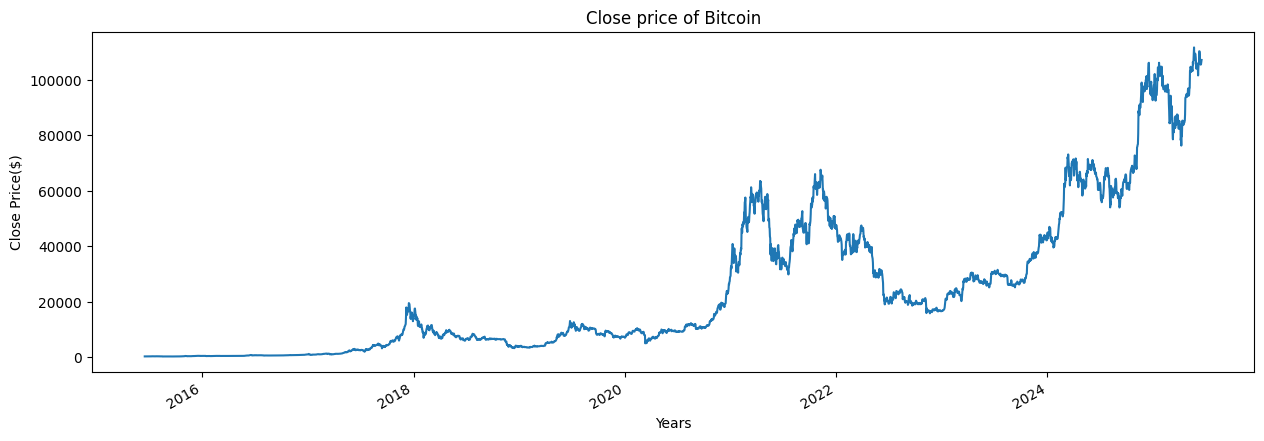

In [75]:
plt.figure(figsize=(15,5))
bit_coin_data['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price($)')
plt.title('Close price of Bitcoin')

**Data preprocessing**

In [76]:
Closing_price = bit_coin_data[['Close']]
Closing_price

Price,Close
Date,
2015-06-17,249.283997
2015-06-18,249.007004
2015-06-19,244.606003
2015-06-20,245.212006
2015-06-21,243.944000
...,...
2025-06-12,105929.054688
2025-06-13,106090.968750
2025-06-14,105472.406250


In [77]:
for i in range(2015,2025):
    print(i, list(Closing_price.index.year).count(i))

2015 198
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


Moving avearge 365

In [78]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

<ipython-input-78-686540890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


,MA_for_365_days
Date,
2015-06-17,NaN
2015-06-18,NaN
2015-06-19,NaN
2015-06-20,NaN
2015-06-21,NaN


In [79]:
Closing_price['MA_for_365_days'][0:365].tail()

,MA_for_365_days
Date,
2016-06-11,NaN
2016-06-12,NaN
2016-06-13,NaN
2016-06-14,NaN
2016-06-15,363.100168


Text(0.5, 1.0, 'Close price of Bitcoin')

<Figure size 640x480 with 0 Axes>

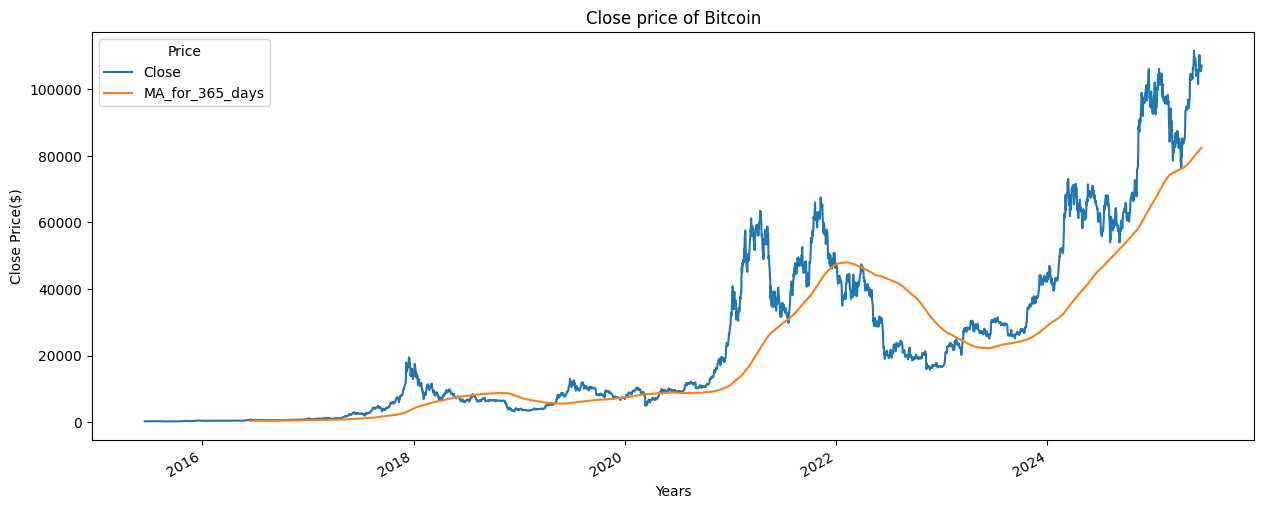

In [80]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price($)')
plt.title('Close price of Bitcoin')

Moving average 100

<ipython-input-81-1013624105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

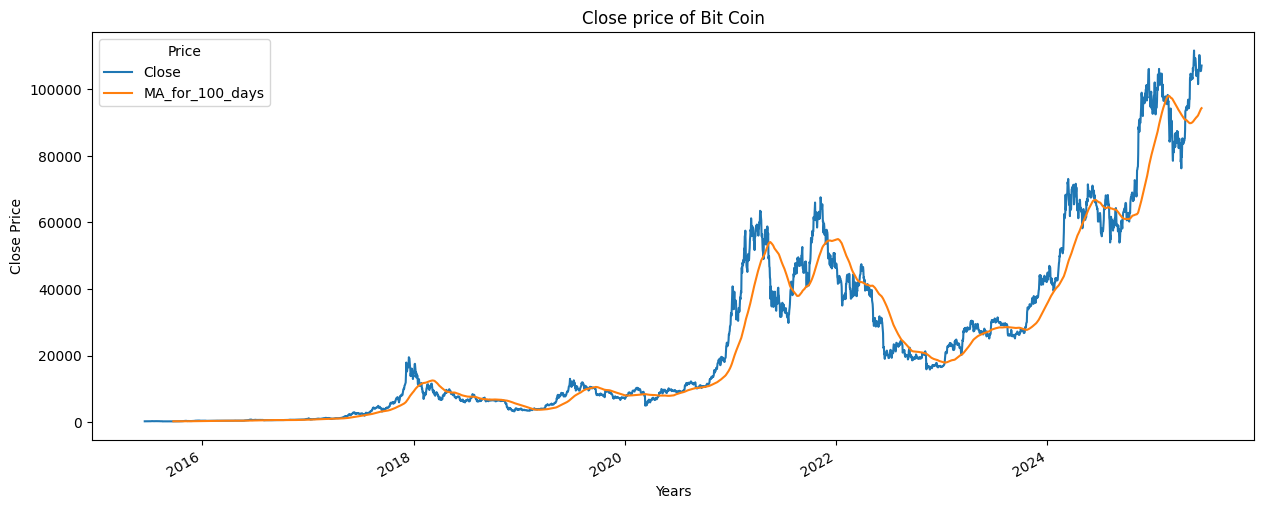

In [81]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

Scaling the data

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[3.47999568e-04],
       [3.45514498e-04],
       [3.06030459e-04],
       ...,
       [9.44368204e-01],
       [9.45082498e-01],
       [9.59447368e-01]])

In [83]:
scaled_data.shape

(3653, 1)

In [84]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [85]:
x_data[0], y_data[0]

(array([[3.47999568e-04],
        [3.45514498e-04],
        [3.06030459e-04],
        [3.11467277e-04],
        [3.00091234e-04],
        [3.27418788e-04],
        [3.03249284e-04],
        [2.69327596e-04],
        [2.89818709e-04],
        [2.96951118e-04],
        [3.63305205e-04],
        [3.45550365e-04],
        [4.17798638e-04],
        [4.71699996e-04],
        [4.31767487e-04],
        [4.02977612e-04],
        [4.11267338e-04],
        [4.52088028e-04],
        [5.51017979e-04],
        [5.25152884e-04],
        [4.99826063e-04],
        [5.40898093e-04],
        [5.26929244e-04],
        [6.67478536e-04],
        [7.41233894e-04],
        [9.00497939e-04],
        [7.31714981e-04],
        [6.90535350e-04],
        [6.75866964e-04],
        [6.06426561e-04],
        [6.18834250e-04],
        [5.77825192e-04],
        [5.66278851e-04],
        [6.14429217e-04],
        [5.86186788e-04],
        [5.98648141e-04],
        [5.88124686e-04],
        [6.97838468e-04],
        [7.0

Splitting the data into train and test set

In [86]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3197, 100, 1)
(3197, 1)
(356, 100, 1)
(356, 1)


**Model building**

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Model = Sequential()

Model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

Model.add(LSTM(64, return_sequences = False))

Model.add(Dense(25))

Model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

**Model compilation**

In [93]:
Model.compile(optimizer='adam', loss='mean_squared_error')

**Model training**

In [94]:
Model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - loss: 0.0017
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - loss: 3.0398e-04
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - loss: 2.3465e-04
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - loss: 1.7675e-04
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - loss: 1.4511e-04
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - loss: 1.0750e-04
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - loss: 1.1269e-04
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - loss: 1.4303e-04
Epoch 9/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - loss: 1.2129e-04
Epoch 10/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - loss: 1.1505e-04


**Model evaluation**

In [95]:
predictions = Model.predict(x_test)
predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


array([[0.5595987 ],
       [0.549304  ],
       [0.5575799 ],
       [0.54532105],
       [0.55136347],
       [0.5677968 ],
       [0.56902057],
       [0.56161886],
       [0.54454774],
       [0.5152135 ],
       [0.51266235],
       [0.52719635],
       [0.5043836 ],
       [0.5132932 ],
       [0.5249678 ],
       [0.5226728 ],
       [0.51948595],
       [0.5246978 ],
       [0.5368224 ],
       [0.5510497 ],
       [0.5890589 ],
       [0.58994895],
       [0.58111554],
       [0.57980084],
       [0.60505885],
       [0.6076369 ],
       [0.6171202 ],
       [0.6109365 ],
       [0.59543025],
       [0.5907141 ],
       [0.5943352 ],
       [0.6143361 ],
       [0.6124489 ],
       [0.6173251 ],
       [0.6033528 ],
       [0.59837425],
       [0.5833168 ],
       [0.59101164],
       [0.55318093],
       [0.54841334],
       [0.52414745],
       [0.4870892 ],
       [0.50638616],
       [0.4965586 ],
       [0.5592499 ],
       [0.55079925],
       [0.55320805],
       [0.532

In [96]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions.head()

array([[ 62584.92 ],
       [ 61437.45 ],
       [ 62359.9  ],
       [ 60993.496],
       [ 61667.   ],
       [ 63498.707],
       [ 63635.11 ],
       [ 62810.098],
       [ 60907.3  ],
       [ 57637.625],
       [ 57353.266],
       [ 58973.266],
       [ 56430.496],
       [ 57423.582],
       [ 58724.863],
       [ 58469.055],
       [ 58113.844],
       [ 58694.77 ],
       [ 60046.21 ],
       [ 61632.027],
       [ 65868.63 ],
       [ 65967.84 ],
       [ 64983.25 ],
       [ 64836.71 ],
       [ 67652.04 ],
       [ 67939.4  ],
       [ 68996.43 ],
       [ 68307.18 ],
       [ 66578.805],
       [ 66053.13 ],
       [ 66456.75 ],
       [ 68686.1  ],
       [ 68475.75 ],
       [ 69019.27 ],
       [ 67461.875],
       [ 66906.95 ],
       [ 65228.61 ],
       [ 66086.3  ],
       [ 61869.582],
       [ 61338.17 ],
       [ 58633.426],
       [ 54502.812],
       [ 56653.703],
       [ 55558.3  ],
       [ 62546.043],
       [ 61604.113],
       [ 61872.6  ],
       [ 5954

In [97]:
inv_y_test = scaler.inverse_transform(y_test)

In [98]:
inv_predictions[:5], inv_y_test[:5]

(array([[62584.92 ],
        [61437.45 ],
        [62359.9  ],
        [60993.496],
        [61667.   ]], dtype=float32),
 array([[60811.27734375],
        [61604.80078125],
        [60320.13671875],
        [60887.37890625],
        [62678.29296875]]))

In [111]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))
r2 = r2_score(inv_y_test, inv_predictions)
mae = mean_absolute_error(inv_y_test, inv_predictions)

# Display in Streamlit
print("Model Evaluation Metrics")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Model Evaluation Metrics
Root Mean Squared Error (RMSE): 2190.06
R² Score: 0.9841
Mean Absolute Error (MAE): 1611.47


In [99]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2024-06-26,60811.277344,62584.921875
2024-06-27,61604.800781,61437.449219
2024-06-28,60320.136719,62359.898438
2024-06-29,60887.378906,60993.496094
2024-06-30,62678.292969,61667.000000


Text(0.5, 1.0, 'Close price of Bitcoin')

<Figure size 640x480 with 0 Axes>

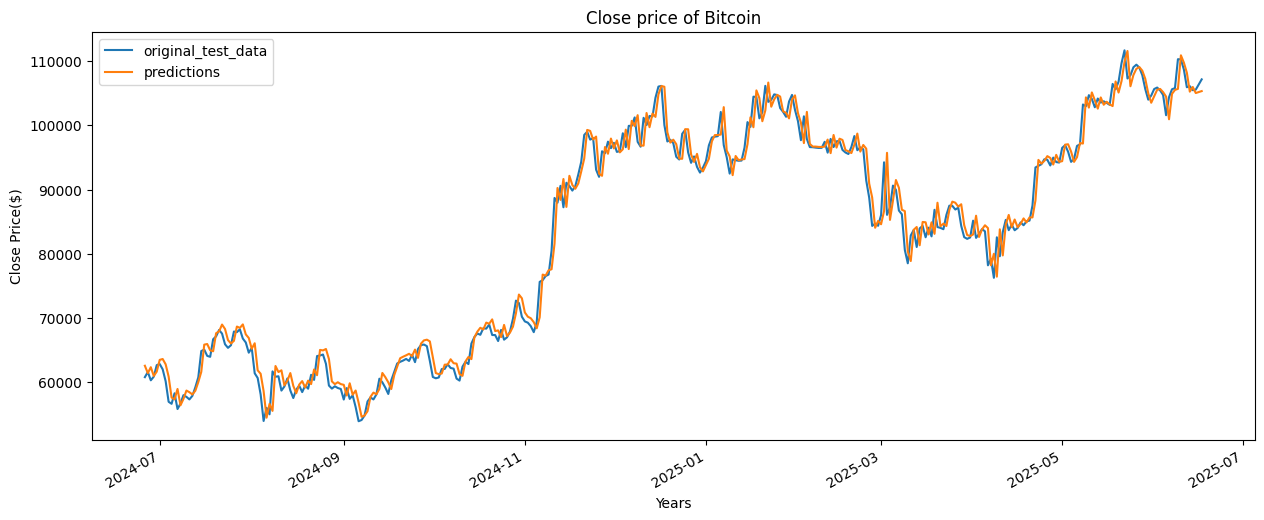

In [100]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price($)')
plt.title('Close price of Bitcoin')

**Prediction on future data**

In [101]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

Price,Close
Date,
2025-06-12,105929.054688
2025-06-13,106090.968750
2025-06-14,105472.406250
2025-06-15,105552.023438
2025-06-17,107153.171875


In [102]:
last_100_scaled = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100_scaled

array([[[0.12228598],
        [0.06384074],
        [0.18615849],
        [0.21045556],
        [0.13543983],
        [0.21742541],
        [0.22799021],
        [0.1781779 ],
        [0.2204362 ],
        [0.18209901],
        [0.29892306],
        [0.22302107],
        [0.2195197 ],
        [0.21356632],
        [0.27632923],
        [0.31713389],
        [0.31636525],
        [0.30024099],
        [0.30804348],
        [0.22827379],
        [0.17868349],
        [0.17125262],
        [0.17730863],
        [0.25132443],
        [0.1755233 ],
        [0.19295533],
        [0.21388609],
        [0.20430995],
        [0.05487171],
        [0.08370824],
        [0.        ],
        [0.17801592],
        [0.0947475 ],
        [0.20148631],
        [0.25465588],
        [0.20939959],
        [0.23361941],
        [0.20894807],
        [0.21925488],
        [0.24360094],
        [0.23103234],
        [0.24833704],
        [0.25146942],
        [0.31769862],
        [0.48500829],
        [0

In [103]:
last_100_scaled.shape

(1, 100, 1)

In [104]:
day101 = Model.predict(last_100_scaled)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[0.8793477]], dtype=float32)

In [105]:
scaler.inverse_transform(day101)

array([[107402.03]], dtype=float32)

In [106]:
def predict_future(no_of_days, prev_100):

    future_predictions = []
    prev_100 = prev_100.reshape(-1).tolist()
    for i in range(no_of_days):
        prev_100_np = np.array(prev_100).reshape(1, -1, 1)
        next_day = Model.predict(prev_100_np).tolist()

        prev_100.append(next_day[0][0])
        prev_100 = prev_100[1:]

        future_predictions.append(scaler.inverse_transform([[next_day[0][0]]]))

    return future_predictions

In [107]:
no_of_days = 10
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1))
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[array([[107402.02895141]]), array([[107423.00951252]]), array([[107490.79805785]]), array([[107563.90823399]]), array([[107629.69431]]), array([[107685.30767303]]), array([[107731.00153312]]), array([[107768.26771935]]), array([[107798.92301371]]), array([[107824.68502423]])]


Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

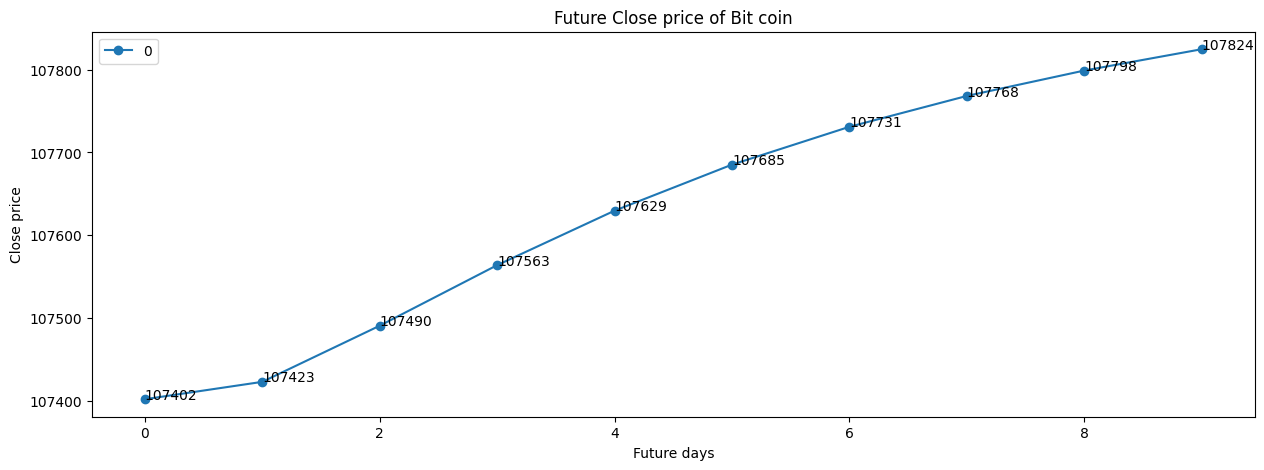

In [108]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")